In [80]:
import pygame, pygame.sndarray
pygame.mixer.init(frequency=44100, size=-16, channels=2)

In [81]:
import numpy as np

In [82]:
arr = np.random.randint(-32768, 32767, size=44100)
arr = np.repeat(arr.reshape(44100, 1), 2, axis = 1)

In [83]:
import matplotlib.pyplot as plt
def plot_function(f,xmin,xmax,**kwargs):
    ts = np.linspace(xmin,xmax,1000)
    plt.plot(ts,[f(t) for t in ts],**kwargs)
    
def plot_sequence(points,max=100,line=False,**kwargs):
    if line:
        plt.plot(range(0,max),points[0:max],**kwargs)
    else:
        plt.scatter(range(0,max),points[0:max],**kwargs)

In [89]:
sound = pygame.sndarray.make_sound(arr)
sound.play()

In [97]:
form = np.repeat([10000,-10000],50)

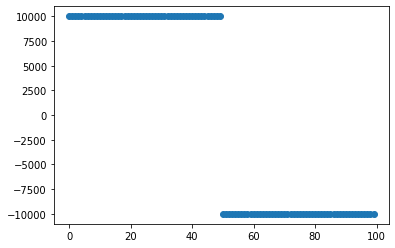

In [98]:
plot_sequence(form)

In [99]:
arr = np.tile(form,441)

In [100]:
arr = np.repeat(arr.reshape(44100, 1), 2, axis = 1)
sound = pygame.sndarray.make_sound(arr)
sound.play()

In [105]:
form = np.repeat([10000,-10000],63)
arr = np.tile(form,350)

In [106]:
arr = np.repeat(arr.reshape(44100, 1), 2, axis = 1)
sound = pygame.sndarray.make_sound(arr)
sound.play()

In [138]:
from math import pi, sin, cos, tan
def make_sinusoid(frequency,amplitude):
    def f(t):
        return amplitude * sin(2*pi*frequency*t)
    return f

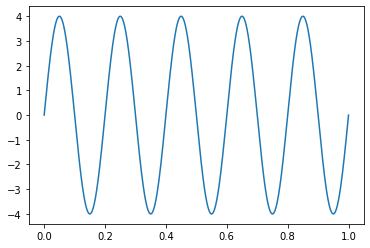

In [139]:
plot_function(make_sinusoid(5,4),0,1)

In [140]:
sinusoid = make_sinusoid(441,8000)

In [141]:
def sample(f,start,end,count):
    mapf = np.vectorize(f)
    ts = np.arange(start,end,(end-start)/count)
    values = mapf(ts)
    values = values.astype(np.int16)
    return np.repeat(values.reshape(44100, 1), 2, axis = 1)

In [142]:
arr = sample(sinusoid,0,1,44100)

In [143]:
sound = pygame.sndarray.make_sound(arr)
sound.play()

In [144]:
def tangent_function(t):
    return sin(2*pi*t) / cos(2*pi*t)

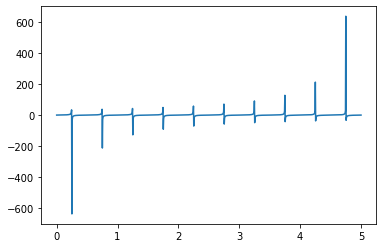

In [145]:
plot_function(tangent_function,0,5)

(-10.0, 10.0)

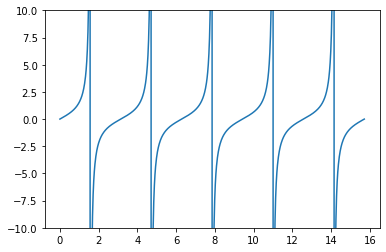

In [146]:
plot_function(tan,0,5*pi)
plt.ylim(-10,10)

In [147]:
def cos_function(t):
    return cos(10*pi*t)

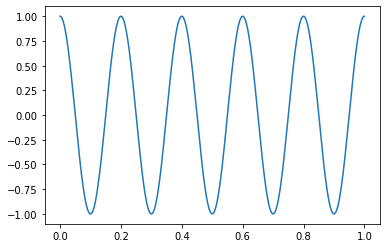

In [148]:
plot_function(cos_function,0,1)

In [149]:
def const(n):
    return 1

In [150]:
def fourier_series(a0,a,b):
    def result(t):
        cos_terms = [an*cos(2*pi*(n+1)*t) for (n,an) in enumerate(a)]
        sin_terms = [bn*sin(2*pi*(n+1)*t) for (n,bn) in enumerate(b)]
        return a0*const(t) + sum(cos_terms) + sum(sin_terms)
    return result

In [151]:
f = fourier_series(0,[0,0,0,0,0],[0,0,0,1,1])

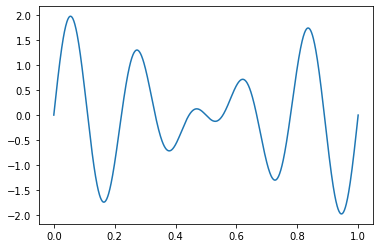

In [152]:
plot_function(f,0,1)

In [165]:
def inner_product(f,g,N=1000):
    dt = 1/N
    return 2*sum([f(t)*g(t)*dt for t in np.arange(0,1,dt)])

In [166]:
def s(n):
    def f(t):
        return sin(2*pi*n*t)
    return f

In [167]:
def c(n):
    def f(t):
        return cos(2*pi*n*t)
    return f

In [168]:
inner_product(s(1),c(1))

4.2197487366314734e-17

In [169]:
inner_product(s(1),s(1))

1.0000000000000002

In [170]:
from math import sqrt

In [171]:
def const(n):
    return 1 / sqrt(2)

In [172]:
def fourier_coefficients(f,N):
    a0 = inner_product(f,const)
    an = [inner_product(f,c(n)) for n in range(1,N+1)]
    bn = [inner_product(f,s(n)) for n in range(1,N+1)]
    return a0, an, bn

In [173]:
f = fourier_series(0, [2,3,4], [5,6,7])

In [174]:
fourier_coefficients(f,3)

(-3.812922200197022e-15,
 [1.9999999999999887, 2.999999999999999, 4.0],
 [5.000000000000002, 6.000000000000001, 7.0000000000000036])

In [175]:
def square(t):
    return 1 if (t%1) < 0.5 el se -1

In [178]:
a0,a,b = fourier_coefficients(square,10)

In [179]:
b[4], 4/(5*pi)

(0.2546269646514865, 0.25464790894703254)

In [180]:
def sawtooth(t):
    return t%1

In [181]:
def modified_sawtooth(t):
    return 8000 * sawtooth(441*t)

In [182]:
arr = sample(modified_sawtooth,0,1,44100)

In [183]:
sound = pygame.sndarray.make_sound(arr)
sound.play()